# Predicting onset of diabetics for Pima Indians

In [3]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Download the data

In [2]:
!wget https://lazyprogrammer.me/course_files/exercises/diabetes.csv

--2025-04-06 15:14:37--  https://lazyprogrammer.me/course_files/exercises/diabetes.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/csv]
Saving to: 'diabetes.csv'

     0K .......... .......... ...                             100% 5,97M=0,004s

2025-04-06 15:14:38 (5,97 MB/s) - 'diabetes.csv' saved [23873/23873]



In [4]:
data = pd.read_csv("diabetes.csv").to_numpy(np.float32)

In [9]:
data.shape

(768, 9)

## Process the data

1. Split the data
2. Standardize the data
3. Convert data to torch Tensor

In [18]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    data[:, 0:7], data[:, 8],
    test_size=0.2
)

N, D = X_train.shape

In [19]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# Convert to torch Tensor
X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
y_train = torch.from_numpy(y_train).reshape((-1, 1))
y_test = torch.from_numpy(y_test).reshape((-1, 1))

y_train.shape

torch.Size([614, 1])

## Build the model

In [34]:
# Initiate the model
model = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()    
)

In [35]:
# Configure the loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

## Train the data

In [36]:
# Number of epochs
num_epochs = 1000

# Record train and test loss and accuracy
train_losses = np.zeros(num_epochs)
test_losses = np.zeros(num_epochs)
train_accuracy = np.zeros(num_epochs)
test_accuracy = np.zeros(num_epochs)

for epoch in range(num_epochs):
    # Zero the params gradient
    optimizer.zero_grad()
    
    # Forward pass
    y_hat_train = model(X_train)
    y_hat_test = model(X_test)
    train_loss = criterion(y_hat_train, y_train)
    test_loss = criterion(y_hat_test, y_test)
    
    # Backward pass
    train_loss.backward()
    optimizer.step()
    
    # Record the loss and accuracy
    train_losses[epoch] = train_loss.item()
    test_losses[epoch] = test_loss.item()
    
    train_accuracy[epoch] = np.mean(
        np.round(y_hat_train.detach().numpy()) == y_train.numpy()
    )
    test_accuracy[epoch] = np.mean(
        np.round(y_hat_test.detach().numpy()) == y_test.numpy()
    )
    
    if epoch % 50 == 0:
        print(f"Epoch {epoch}: train_loss={train_loss.item()}; \
            test_loss={test_loss.item()}; train_acc={train_accuracy[epoch]} \
            test_acc={test_accuracy[epoch]}")

Epoch 0: train_loss=0.7400639057159424;             test_loss=0.7607203125953674; train_acc=0.46416938110749184             test_acc=0.43506493506493504
Epoch 50: train_loss=0.5643206834793091;             test_loss=0.5618211030960083; train_acc=0.750814332247557             test_acc=0.7597402597402597
Epoch 100: train_loss=0.5161932706832886;             test_loss=0.5059307813644409; train_acc=0.7719869706840391             test_acc=0.7922077922077922
Epoch 150: train_loss=0.49737176299095154;             test_loss=0.4839603304862976; train_acc=0.7703583061889251             test_acc=0.7987012987012987
Epoch 200: train_loss=0.4885742962360382;             test_loss=0.4735143184661865; train_acc=0.7671009771986971             test_acc=0.7857142857142857
Epoch 250: train_loss=0.48401206731796265;             test_loss=0.46789073944091797; train_acc=0.7654723127035831             test_acc=0.7857142857142857
Epoch 300: train_loss=0.48148030042648315;             test_loss=0.46457731723785

### Examine the loss and accuracy through time

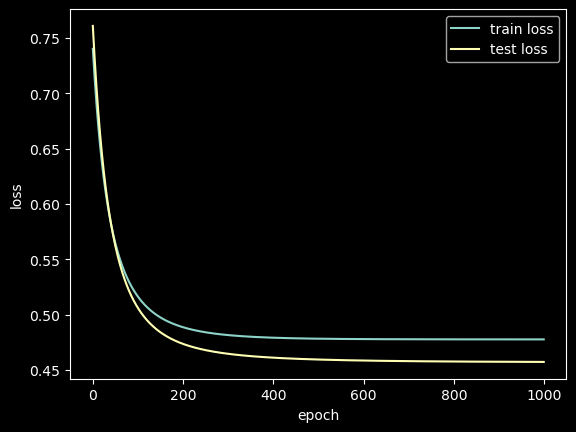

In [37]:
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(["train loss", "test loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

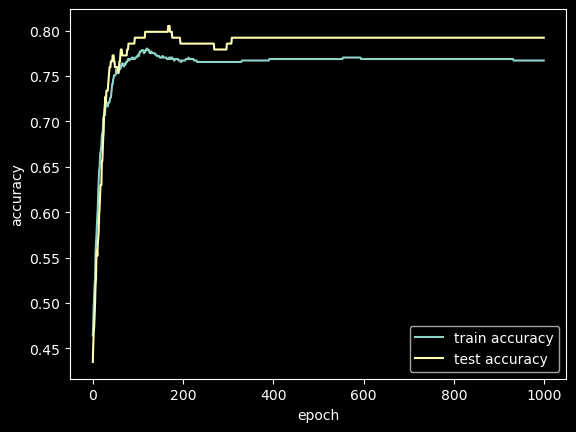

In [38]:
plt.plot(train_accuracy)
plt.plot(test_accuracy)
plt.legend(["train accuracy", "test accuracy"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()